The shortest path from San Francisco to New York is: San Francisco -> Las Vegas -> Denver -> Chicago -> New York


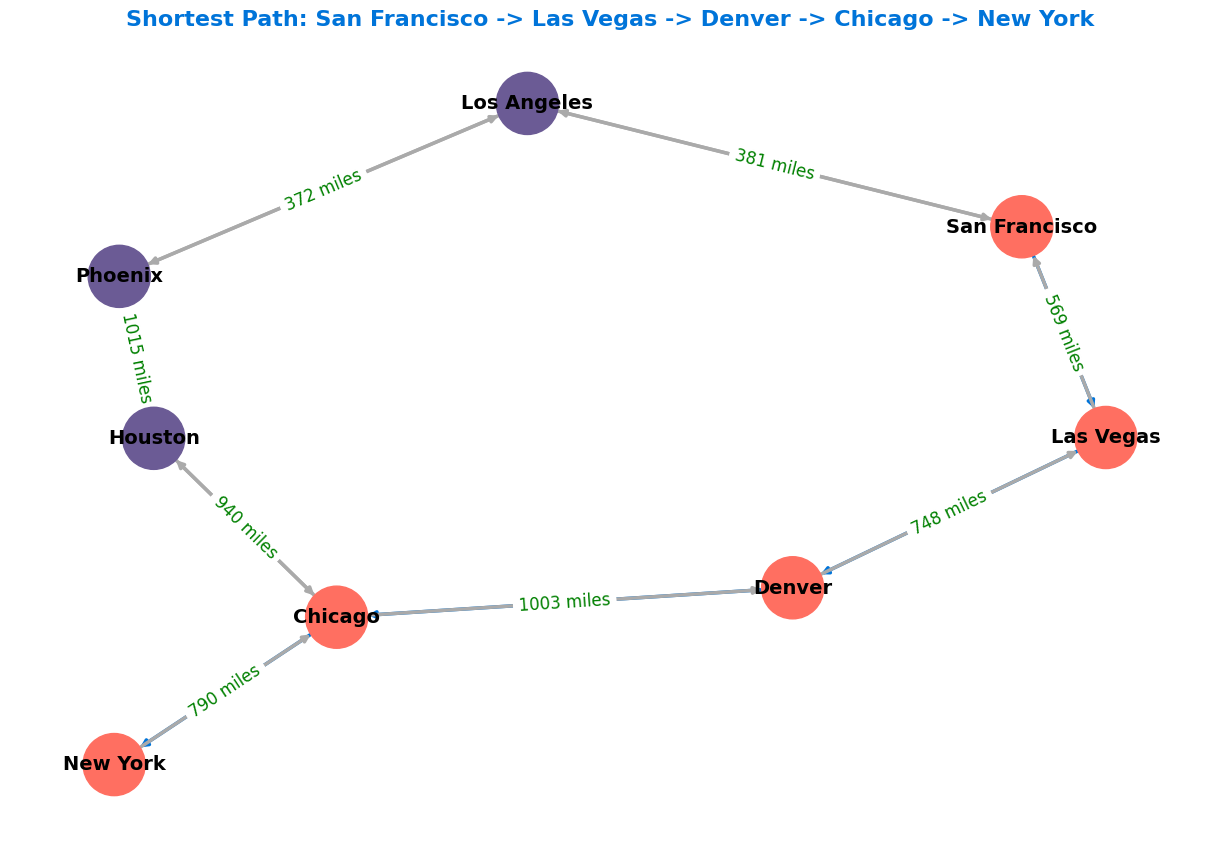

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import heapq

# Define the map with cities as nodes and distances as edge weights
city_graph = {
    'San Francisco': {'Los Angeles': 381, 'Las Vegas': 569},
    'Los Angeles': {'Phoenix': 372, 'San Francisco': 381},
    'Las Vegas': {'Denver': 748, 'San Francisco': 569},
    'Phoenix': {'Houston': 1015, 'Los Angeles': 372},
    'Denver': {'Chicago': 1003, 'Las Vegas': 748},
    'Houston': {'Chicago': 940, 'Phoenix': 1015},
    'Chicago': {'New York': 790, 'Denver': 1003, 'Houston': 940},
    'New York': {'Chicago': 790}
}

# Heuristic values (straight-line distances to the goal - New York)
heuristic = {
    'San Francisco': 2571,
    'Los Angeles': 2445,
    'Las Vegas': 2220,
    'Phoenix': 2145,
    'Denver': 1775,
    'Houston': 1627,
    'Chicago': 790,
    'New York': 0  # Goal node
}

# A* Algorithm
def a_star(city_graph, start, goal, heuristic):
    pq = [(0 + heuristic[start], start, [])]  # Priority queue with (f_score, city, path)
    visited = set()

    while pq:
        (f_score, current_city, path) = heapq.heappop(pq)

        if current_city in visited:
            continue

        path = path + [current_city]
        visited.add(current_city)

        if current_city == goal:
            return path

        for neighbor, distance in city_graph[current_city].items():
            if neighbor not in visited:
                g_score = sum(city_graph[city][neighbor] for city, neighbor in zip(path, path[1:] + [neighbor])) + distance
                heapq.heappush(pq, (g_score + heuristic[neighbor], neighbor, path))

    return None

# Visualization Function
def visualize_path(city_graph, path, title):
    G = nx.DiGraph()

    for city in city_graph:
        for neighbor, distance in city_graph[city].items():
            G.add_edge(city, neighbor, weight=distance)

    pos = nx.spring_layout(G, seed=42)  # Layout for a consistent view
    plt.figure(figsize=(12, 8))

    # Node and edge colors
    node_colors = ['#FF6F61' if city in path else '#6B5B95' for city in G.nodes()]
    edge_colors = ['#0074D9' if (u, v) in zip(path, path[1:]) else '#AAAAAA' for u, v in G.edges()]

    nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors, node_size=2000, font_size=14, font_weight='bold', width=2.5)

    # Draw edge labels (distances)
    edge_labels = {(u, v): f'{d["weight"]} miles' for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='green', font_size=12)

    plt.title(title, fontsize=16, fontweight='bold', color='#0074D9')
    plt.axis('off')
    plt.show()

# Example usage: Find the shortest path from 'San Francisco' to 'New York'
start_city = 'San Francisco'
goal_city = 'New York'

shortest_path = a_star(city_graph, start_city, goal_city, heuristic)

if shortest_path:
    print(f"The shortest path from {start_city} to {goal_city} is: {' -> '.join(shortest_path)}")
    visualize_path(city_graph, shortest_path, f"Shortest Path: {' -> '.join(shortest_path)}")
else:
    print(f"No path found from {start_city} to {goal_city}.")
